In [14]:
from langgraph.graph import StateGraph,START,END
from langgraph.checkpoint.memory import InMemorySaver
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import Annotated,Literal,TypedDict
from dotenv import load_dotenv
import os

In [15]:
api_key=os.getenv('GOOGLE_API_KEY')
model=ChatGoogleGenerativeAI(model='gemini-2.5-flash-lite-preview-09-2025',api_key=api_key,temperature=0.7)

In [16]:
class JokeState(TypedDict):
    title:str
    joke:str
    explanation:str

In [22]:
def make_joke(state:JokeState):
    title=state['title']
    result=model.invoke(f'Make one joke on the topic of {title}').content
    return {'joke':result}

In [23]:
def explain_joke(state:JokeState):
    joke=state['joke']
    result=model.invoke(f'Explain me this joke: {joke}').content
    return {'explanation':result}

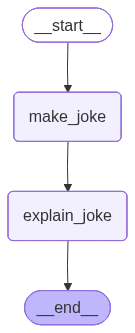

In [27]:
checkpointer=InMemorySaver()
thread_id='1'
# make the graph
graph=StateGraph(JokeState)

# make the nodes
graph.add_node('make_joke',make_joke)
graph.add_node('explain_joke',explain_joke)

# make the edges
graph.add_edge(START,'make_joke')
graph.add_edge('make_joke','explain_joke')
graph.add_edge('explain_joke',END)

# make the workflow of the graph
joke=graph.compile(checkpointer=checkpointer)
joke

In [32]:
# execute the graph
initial_state={
    'title':'Democracy'
}
config1={'configurable':{'thread_id':'1'}}

In [33]:
output_state=joke.invoke(initial_state,config=config1)

In [36]:
joke.get_state(config1)

StateSnapshot(values={'title': 'Democracy', 'joke': 'Why did the ballot box break up with the voting booth?\n\nBecause it felt like the booth was always trying to *influence* its decision!', 'explanation': 'This is a clever play on words that works on two levels:\n\n**1. The Literal/Physical Level (The Objects):**\n\n* **Ballot Box:** This is the container where you put your completed ballot (your vote).\n* **Voting Booth:** This is the private enclosure where you mark your ballot.\n\nIn a physical sense, the booth is the place where the decision (the marking of the vote) is *made*, and the ballot box is the place where the decision is *deposited*.\n\n**2. The Figurative/Political Level (The Pun):**\n\nThe humor comes from the word **"influence"**:\n\n* **In a Political Context:** "Influence" refers to trying to sway someone\'s opinion or decision, often in a biased or persuasive way. The joke suggests the booth was pressuring the box about *how* to vote.\n* **In the Context of the Jok

In [37]:
list(joke.get_state_history(config1))

[StateSnapshot(values={'title': 'Democracy', 'joke': 'Why did the ballot box break up with the voting booth?\n\nBecause it felt like the booth was always trying to *influence* its decision!', 'explanation': 'This is a clever play on words that works on two levels:\n\n**1. The Literal/Physical Level (The Objects):**\n\n* **Ballot Box:** This is the container where you put your completed ballot (your vote).\n* **Voting Booth:** This is the private enclosure where you mark your ballot.\n\nIn a physical sense, the booth is the place where the decision (the marking of the vote) is *made*, and the ballot box is the place where the decision is *deposited*.\n\n**2. The Figurative/Political Level (The Pun):**\n\nThe humor comes from the word **"influence"**:\n\n* **In a Political Context:** "Influence" refers to trying to sway someone\'s opinion or decision, often in a biased or persuasive way. The joke suggests the booth was pressuring the box about *how* to vote.\n* **In the Context of the Jo

In [38]:
config2={'configurable':{'thread_id':'2'}}
outputs=joke.invoke({'title':'Samosa'},config=config2)

In [39]:
outputs

{'title': 'Samosa',
 'joke': 'Why did the samosa break up with the chutney?\n\nBecause it felt their relationship was getting too **spicy**!',
 'explanation': 'This is a simple, food-based pun! Here\'s the breakdown of why it\'s funny:\n\n1. **The Characters:** The joke features two very common and popular Indian snacks:\n    * **Samosa:** A fried or baked pastry with a savory filling (often potatoes, peas, and spices).\n    * **Chutney:** A flavorful condiment (like a sauce or relish) that is almost always served *with* the samosa.\n\n2. **The Relationship:** Samosas and chutneys are meant to be together. They are a classic pairing, making the idea of them "breaking up" inherently silly.\n\n3. **The Punchline (The Pun):** "Because it felt their relationship was getting too **spicy**!"\n    * **Literal Meaning (Food):** Chutneys are often spicy (hot) due to ingredients like chilies or ginger. The relationship between the two foods is literally enhanced by spice.\n    * **Figurative Mea

In [41]:
list(joke.get_state_history(config2))

[StateSnapshot(values={'title': 'Samosa', 'joke': 'Why did the samosa break up with the chutney?\n\nBecause it felt their relationship was getting too **spicy**!', 'explanation': 'This is a simple, food-based pun! Here\'s the breakdown of why it\'s funny:\n\n1. **The Characters:** The joke features two very common and popular Indian snacks:\n    * **Samosa:** A fried or baked pastry with a savory filling (often potatoes, peas, and spices).\n    * **Chutney:** A flavorful condiment (like a sauce or relish) that is almost always served *with* the samosa.\n\n2. **The Relationship:** Samosas and chutneys are meant to be together. They are a classic pairing, making the idea of them "breaking up" inherently silly.\n\n3. **The Punchline (The Pun):** "Because it felt their relationship was getting too **spicy**!"\n    * **Literal Meaning (Food):** Chutneys are often spicy (hot) due to ingredients like chilies or ginger. The relationship between the two foods is literally enhanced by spice.\n  

In [ ]:
# # Time Travel Concept
# joke.invoke(None,{'configurable':{'thread_id':'2','checkpoint_id':'1f0a8d5e-002b-6f6e-bfff-a0bb9c5701a6'}})

{'title': 'Samosa',
 'joke': 'Why did the samosa break up with the chutney?\n\nBecause it felt like their relationship was getting a little too **spicy**!',
 'explanation': 'This is a classic food pun joke! Here\'s the breakdown of why it\'s funny:\n\n1. **The Characters:**\n    * **Samosa:** A popular, savory, deep-fried pastry (usually triangular) from South Asia.\n    * **Chutney:** A condiment (sauce or relish) that is often served *with* the samosa.\n\n2. **The Context (The Relationship):**\n    * Samosas and chutneys are almost always eaten together. They are a natural, expected pairing.\n\n3. **The Punchline: "Too Spicy"**\n    * **Literal Meaning (Food):** Chutneys, especially mint or chili chutneys, are often quite spicy (hot). The samosa might genuinely be overwhelmed by the heat of the chutney.\n    * **Figurative Meaning (Relationship):** In human relationships, saying things are getting "too spicy" means the relationship has become:\n        * Too intense or passionate.\n 

In [53]:
# Updating the State
joke.update_state({'configurable':{'thread_id':'2','checkpoint_id':'1f0a8d5e-0034-6590-8000-6fde19df356c','checkpoint_ns':''}},{'topic':'Golgappa'})

{'configurable': {'thread_id': '2',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0a8de9-0c68-65bb-8001-893d9d521943'}}

In [56]:
list(joke.get_state_history(config1))

[StateSnapshot(values={}, next=('make_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a8de8-3a0c-6873-8000-4c68fd5007aa'}}, metadata={'source': 'update', 'step': 0, 'parents': {}}, created_at='2025-10-14T09:16:49.304382+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a8d5e-0034-6590-8000-6fde19df356c'}}, tasks=(PregelTask(id='cca02d80-95cd-1e63-ee14-233d5e805cb4', name='make_joke', path=('__pregel_pull', 'make_joke'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={}, next=('make_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a8de6-f50f-627c-8000-1388a7e650d6'}}, metadata={'source': 'update', 'step': 0, 'parents': {}}, created_at='2025-10-14T09:16:15.226738+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0a8d5e-0034-6590-8000-6fde19df356c'}}, tasks